In [1]:
import sys
sys.path.append('/opt/conda/pkgs')
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/4262b1bf4bf1ffb403c0eb7a42ad5906_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/4506eccf78279d93d0e8a34c035e91c5_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/6bda807e3967eae797c7b1b9eeaee8db_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/c2a47d89d1d34e789fdf782557bb7194_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/c6c5514ada15b890fb27d1e36371554c_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/d964a294c2d0fef56a434c021026281e_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/e1c932db5cd4271709e54d8028824bc9_/lib/python3.12/site-packages")

import pickle, os, gzip, json, sys, itertools
from pathlib import Path
from importlib import reload
from dataclasses import dataclass, field
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pysam
import scipy as sp
import seaborn
import sharedmem


plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 300


sys.path.append("scripts")
sys.path.append("../../scripts")

In [ ]:
import glob
evaluate_dir = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/ch6_50M/pbsim_ONT_93_30k/kmer_k16/'
file_list = glob.glob(evaluate_dir + '*_benchmark.csv')  
  
# 循环打开文件  
statistic_dfs =[]
for file in file_list:  
    df = pd.read_csv(file, sep='\t')
    head = file.rfind('/')
    tail = file.rfind('_') 
    df['method'] = file[head+1:tail]
    statistic_dfs.append(df)

all_stat_df = pd.concat(statistic_dfs,ignore_index = True)

visul_method = ['SimHash_TF','Minimap2', 'MinHash_Jaccard_None_None']
method_compare = all_stat_df[all_stat_df['method'].isin(visul_method)] 
all_stat_df = method_compare

ParserError: Error tokenizing data. C error: Expected 11 fields in line 44, saw 12


In [2]:
header = ['method','s','h:m:s','max_rss','max_vms','max_uss','max_pss','io_in','io_out','mean_load','cpu_time']

In [3]:
df = pd.read_csv('/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/chr6_50M/pbsim_ONT_93_30k/kmer_k16/summarize_benchmark.csv', sep='\t',header=None)

In [4]:
header = ['method','s','h:m:s','max_rss','max_vms','max_uss','max_pss','io_in','io_out','mean_load','cpu_time']
df.columns=header

In [8]:
df

,method,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time
0,NewSimHash2_Cosine_None_None_benchmark.csv,2005.2434,0:33:25,439442.10,439799.07,439437.73,439438.79,0.28,0.04,98.71,1979.94
1,NewSimHash_Cosine_None_IDF_benchmark.csv,7234.0754,2:00:34,431456.31,439799.08,431448.34,431450.64,33.84,9.98,95.79,6929.69
2,NewSimHash3_Cosine_None_IDF_benchmark.csv,3447.6880,0:57:27,439448.06,439799.20,439440.46,439442.60,451.32,0.04,115.11,3968.71
3,SimHash_Cosine_None_IDF_benchmark.csv,2911.7352,0:48:31,439457.35,439776.20,439453.04,439454.09,0.00,0.04,98.83,2877.81
4,NewSimHash2_Cosine_None_TF-IDF_benchmark.csv,2274.7283,0:37:54,439407.97,439799.08,439399.89,439402.08,819.83,0.04,96.77,2201.41
5,BlockSimHash_Cosine_None_TF_benchmark.csv,3171.5144,0:52:51,439447.54,439824.07,439443.35,439444.39,0.01,0.04,99.43,3154.13
6,NewSimHash_Cosine_None_None_benchmark.csv,4437.4598,1:13:57,439456.46,439799.21,439452.15,439453.21,0.00,9.98,99.71,4424.72
7,BlockSimHash_Cosine_None_IDF_benchmark.csv,2366.9309,0:39:26,439422.62,439823.95,439418.25,439419.28,0.71,0.04,98.88,2341.03
8,SimHash_Cosine_None_TF_benchmark.csv,2167.0633,0:36:07,439437.30,439799.20,439429.28,439431.59,0.05,0.04,99.45,2155.64
9,SimHash_Cosine_None_None_benchmark.csv,3129.8559,0:52:09,439459.02,439799.20,439442.55,439448.47,0.00,0.04,99.14,3103.12


In [5]:
df1 = df.sort_values(by='method')
color_list = seaborn.color_palette("tab10")
df1['color']= [color_list[0]]*4+[color_list[1]]*4+[color_list[2]]*4+[color_list[3]]*4+[color_list[4]]*4

Text(0, 0.5, 'method')

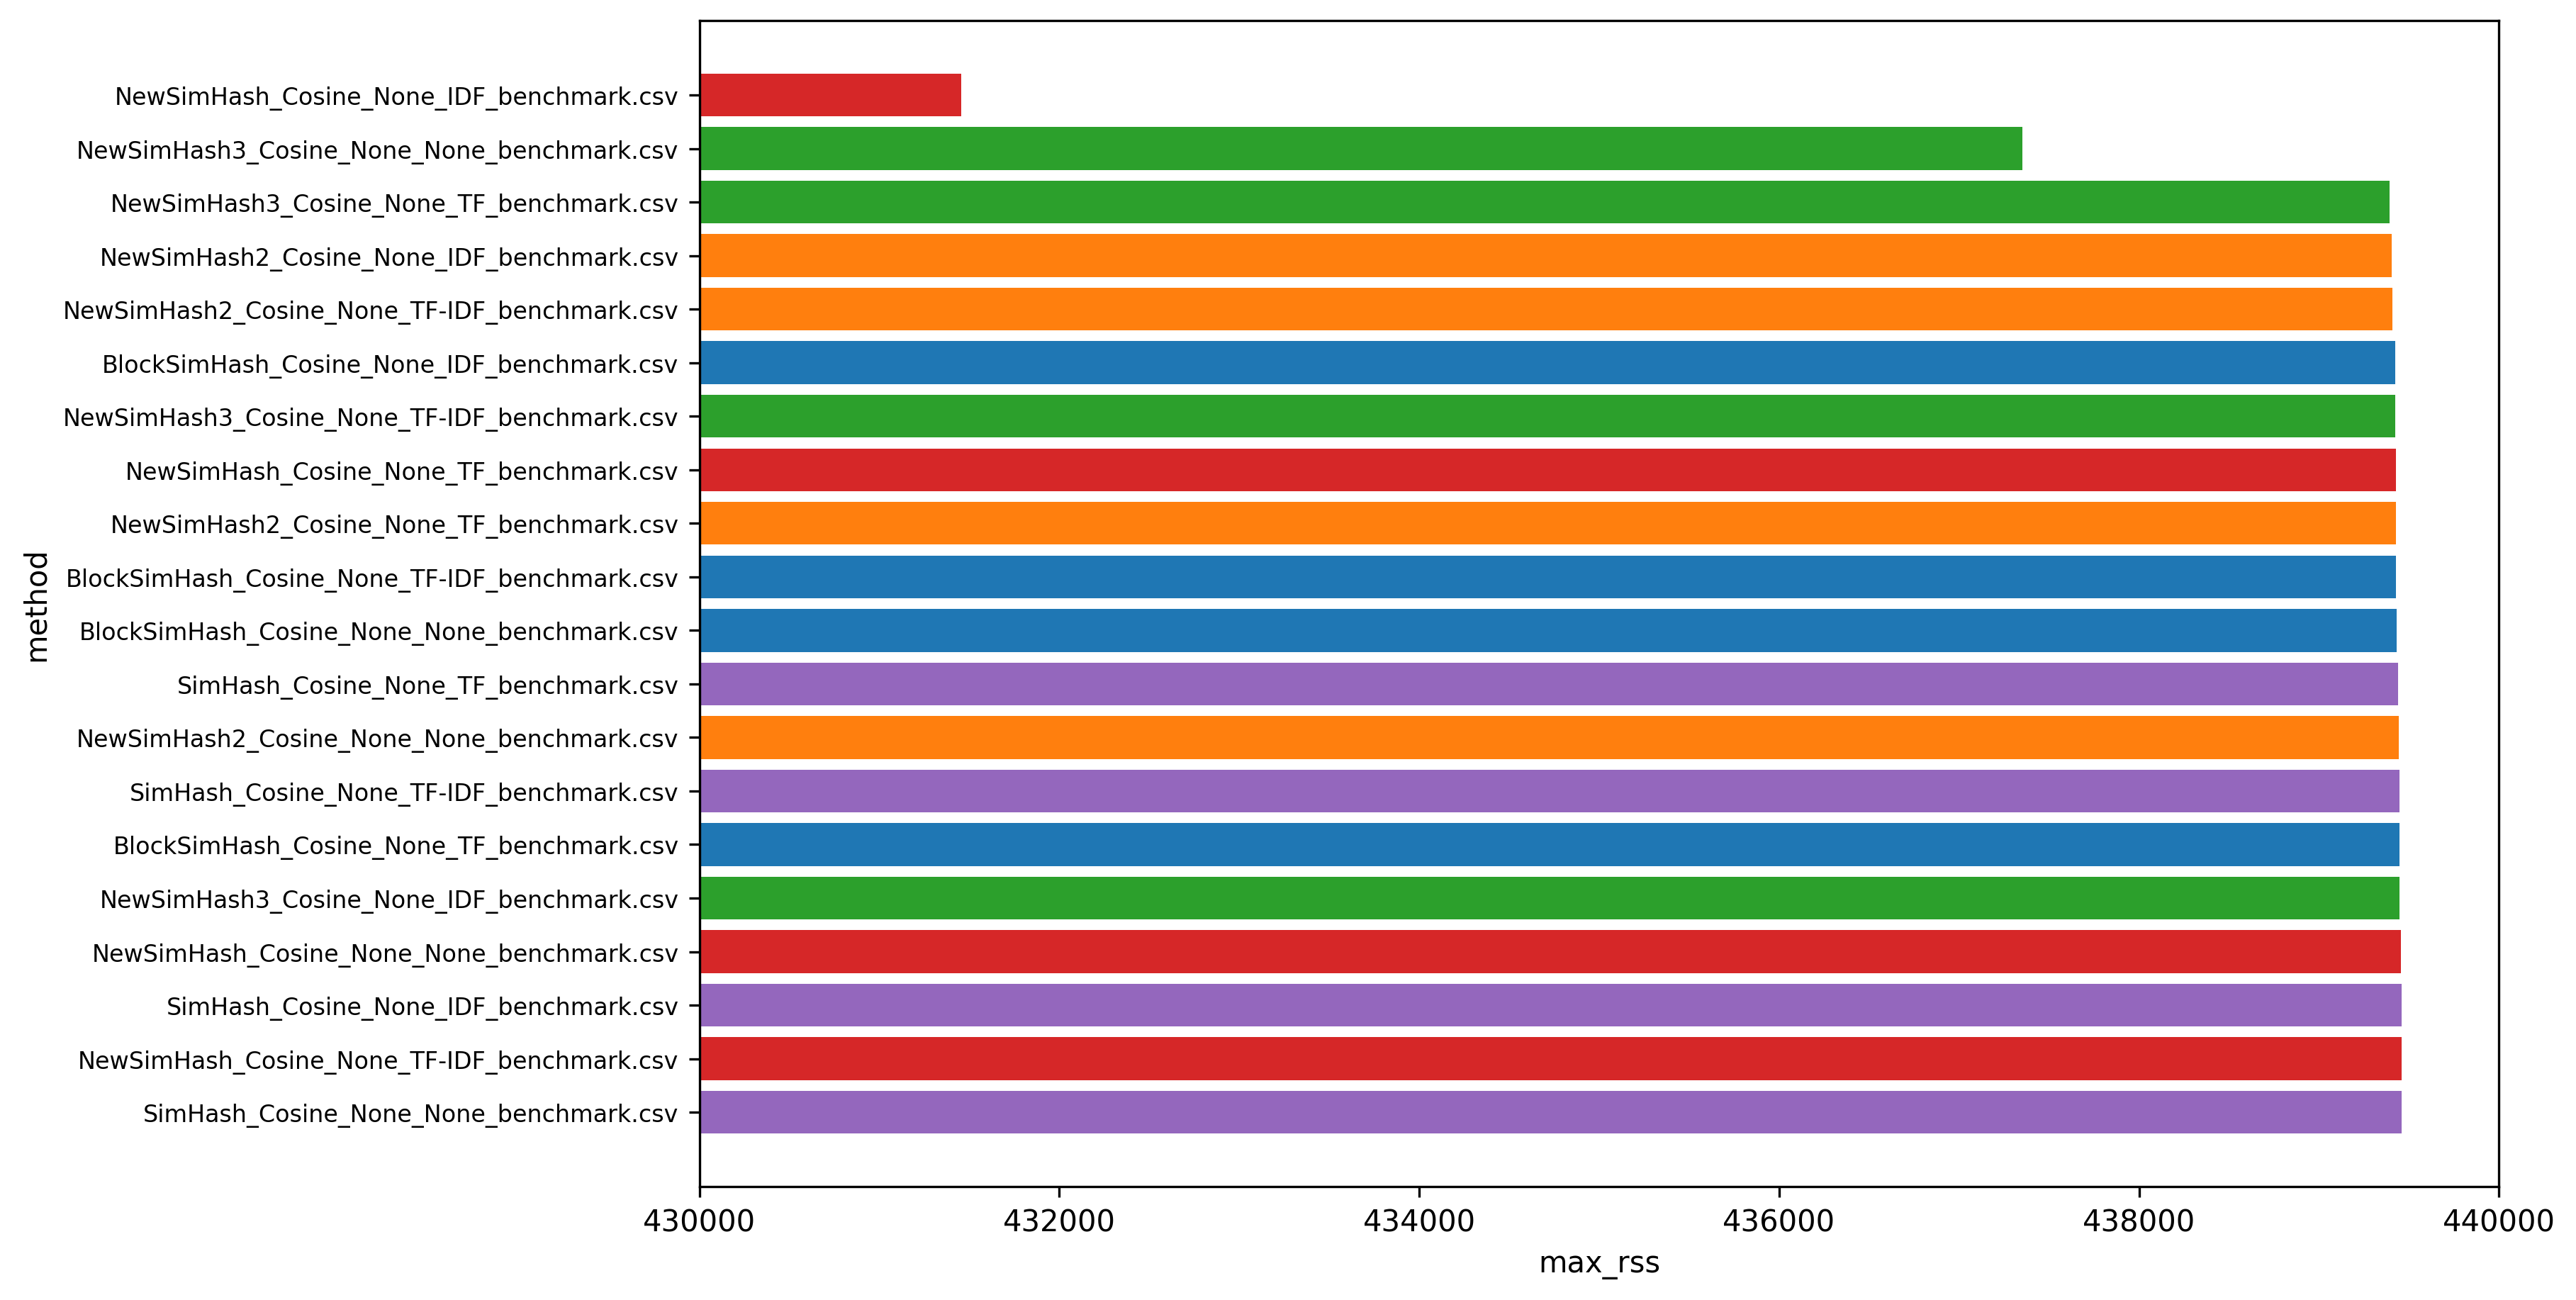

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True) 
new = df1.sort_values(by='max_rss',ascending=False)
colors = new['color']
ax.barh(new['method'], new['max_rss'],color=colors)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlim(430000,440000)
ax.set_xlabel('max_rss')
ax.set_ylabel('method')

In [18]:
len(colors)

20

In [28]:
all_stat_df = all_stat_df.replace({'MinHash_Jaccard_None_None':'MinHash'})  
all_stat_df = all_stat_df.replace({'SimHash_TF':'SimHash'})  

all_stat_df.sort_index()
all_stat_df.loc[8,'cpu_time']+= 377.045 ##IGK
all_stat_df.loc[8,'max_rss']+= 2777.58 ##HLA

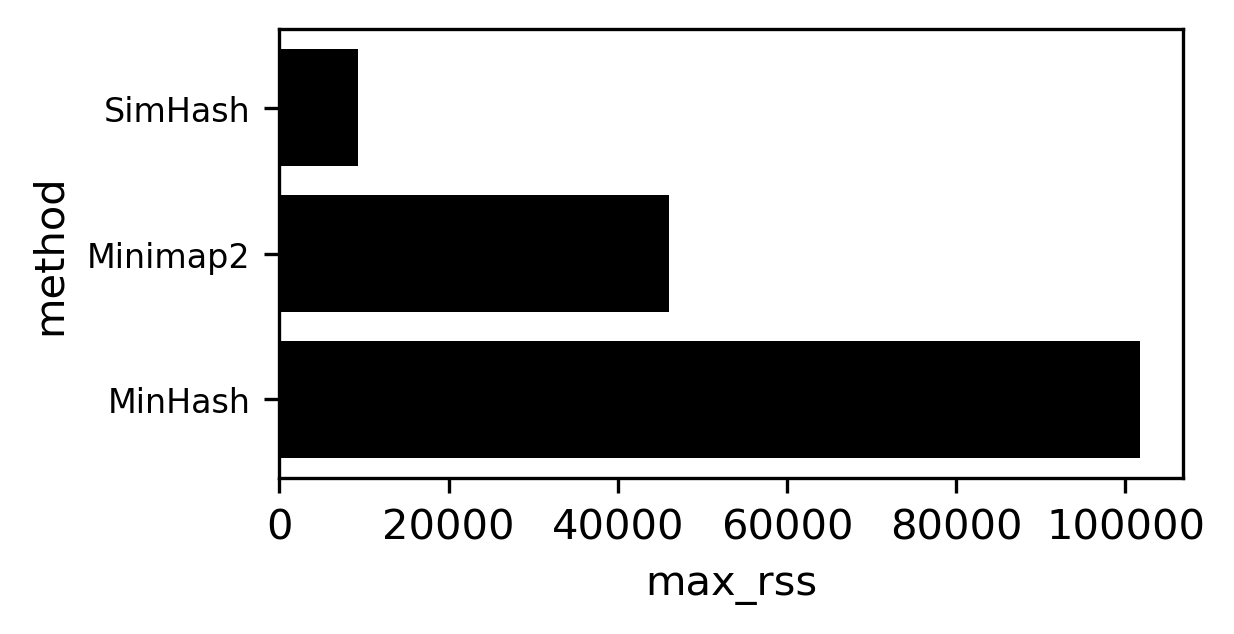

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2), constrained_layout=True) 
new = all_stat_df.sort_values(by='max_rss',ascending=False)
colors = ['skyblue' if 'sc' in value else 'pink' for value in new['method']]
ax.barh(new['method'], new['max_rss'],color='black')
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('max_rss')
ax.set_ylabel('method')
plt.savefig('HLA_max.pdf', format='pdf')  


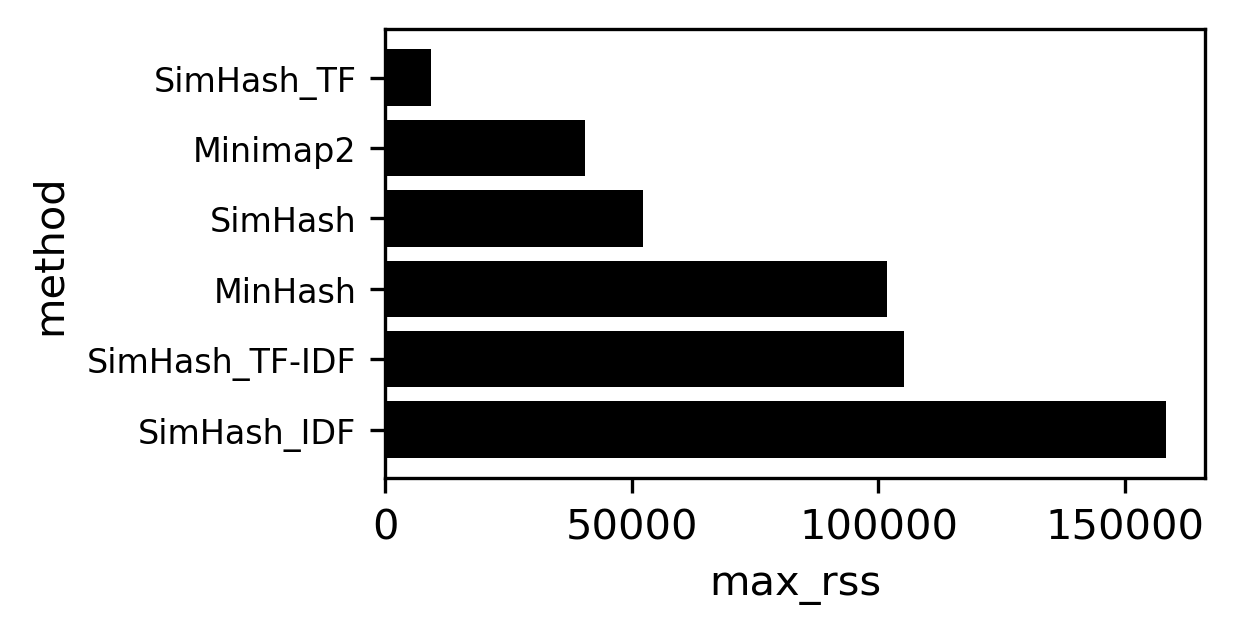

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2), constrained_layout=True) 
new = all_stat_df.sort_values(by='max_rss',ascending=False)
colors = ['skyblue' if 'sc' in value else 'pink' for value in new['method']]
ax.barh(new['method'], new['max_rss'],color='black')   
ax.tick_params(axis='y', labelsize=8)  
ax.set_xlabel('max_rss')  
ax.set_ylabel('method')  
plt.savefig('HLA_load.pdf', format='pdf')  
